In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, display
from rxnmapper import RXNMapper

In [18]:
# https://gist.github.com/greglandrum/61c1e751b453c623838759609dc41ef1
def draw_chemical_reaction(smiles, highlightByReactant=False, font_scale=1.5):
    rxn = rdChemReactions.ReactionFromSmarts(smiles,useSmiles=True)
    trxn = rdChemReactions.ChemicalReaction(rxn)
    # move atom maps to be annotations:
    for m in trxn.GetReactants():
        moveAtomMapsToNotes(m)
    for m in trxn.GetProducts():
        moveAtomMapsToNotes(m)
    d2d = rdMolDraw2D.MolDraw2DSVG(800,300)
    d2d.drawOptions().annotationFontScale=font_scale
    d2d.DrawReaction(trxn,highlightByReactant=highlightByReactant)

    d2d.FinishDrawing()

    return d2d.GetDrawingText()

def moveAtomMapsToNotes(m):
    for at in m.GetAtoms():
        if at.GetAtomMapNum():
            at.SetProp("atomNote",str(at.GetAtomMapNum()))

In [11]:
rxn_mapper = RXNMapper()

Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


In [19]:
rxns = ['CCOCC.C[Mg+].O=Cc1ccc(F)cc1Cl.[Br-]>>CC(O)c1ccc(F)cc1Cl',
       'BrCCOCCBr.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.NCC(F)(F)CO>>OCC(F)(F)CN1CCOCC1'
       ]


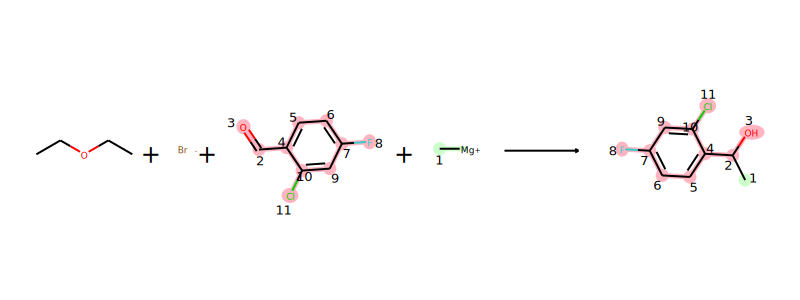

Confidence: 0.94


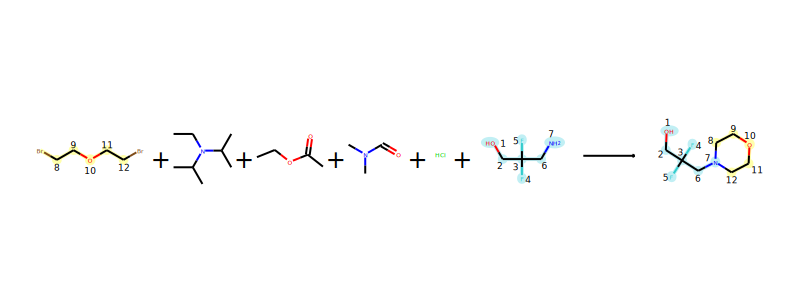

Confidence: 0.51


In [20]:
outputs = rxn_mapper.get_attention_guided_atom_maps(rxns)

for out in outputs:
    display(SVG(draw_chemical_reaction(out['mapped_rxn'],  highlightByReactant=True)))
    print(f'Confidence: {out["confidence"]:.2f}')

In [9]:
out['mapped_rxn']

'CCOCC.[Br-].[CH:2](=[O:3])[c:4]1[cH:5][cH:6][c:7]([F:8])[cH:9][c:10]1[Cl:11].[Mg+][CH3:1]>>[CH3:1][CH:2]([OH:3])[c:4]1[cH:5][cH:6][c:7]([F:8])[cH:9][c:10]1[Cl:11]'